import Libraries

In [1]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score,ConfusionMatrixDisplay

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


Data Collection

In [2]:
disease_data=pd.read_csv('/kaggle/input/heart-disease-dataset/heart.csv')

Exploratory Data Analysis

In [3]:
disease_data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [4]:
disease_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [5]:
disease_data.describe().T

,count,mean,std,min,25%,50%,75%,max
age,1025.0,54.434146,9.072290,29.0,48.0,56.0,61.0,77.0
sex,1025.0,0.695610,0.460373,0.0,0.0,1.0,1.0,1.0
cp,1025.0,0.942439,1.029641,0.0,0.0,1.0,2.0,3.0
trestbps,1025.0,131.611707,17.516718,94.0,120.0,130.0,140.0,200.0
chol,1025.0,246.000000,51.592510,126.0,211.0,240.0,275.0,564.0
fbs,1025.0,0.149268,0.356527,0.0,0.0,0.0,0.0,1.0
restecg,1025.0,0.529756,0.527878,0.0,0.0,1.0,1.0,2.0
thalach,1025.0,149.114146,23.005724,71.0,132.0,152.0,166.0,202.0
exang,1025.0,0.336585,0.472772,0.0,0.0,0.0,1.0,1.0
oldpeak,1025.0,1.071512,1.175053,0.0,0.0,0.8,1.8,6.2


In [6]:
disease_data.dtypes

age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
target        int64
dtype: object

In [7]:
# check for unique values
disease_data.nunique()

age          41
sex           2
cp            4
trestbps     49
chol        152
fbs           2
restecg       3
thalach      91
exang         2
oldpeak      40
slope         3
ca            5
thal          4
target        2
dtype: int64

In [8]:
disease_data['target'].value_counts()

1    526
0    499
Name: target, dtype: int64

Data Cleaning

In [9]:
disease_data.isnull().sum()


age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [10]:
# check for duplicate data
disease_data.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
1020     True
1021     True
1022     True
1023     True
1024     True
Length: 1025, dtype: bool

Check for Outliers

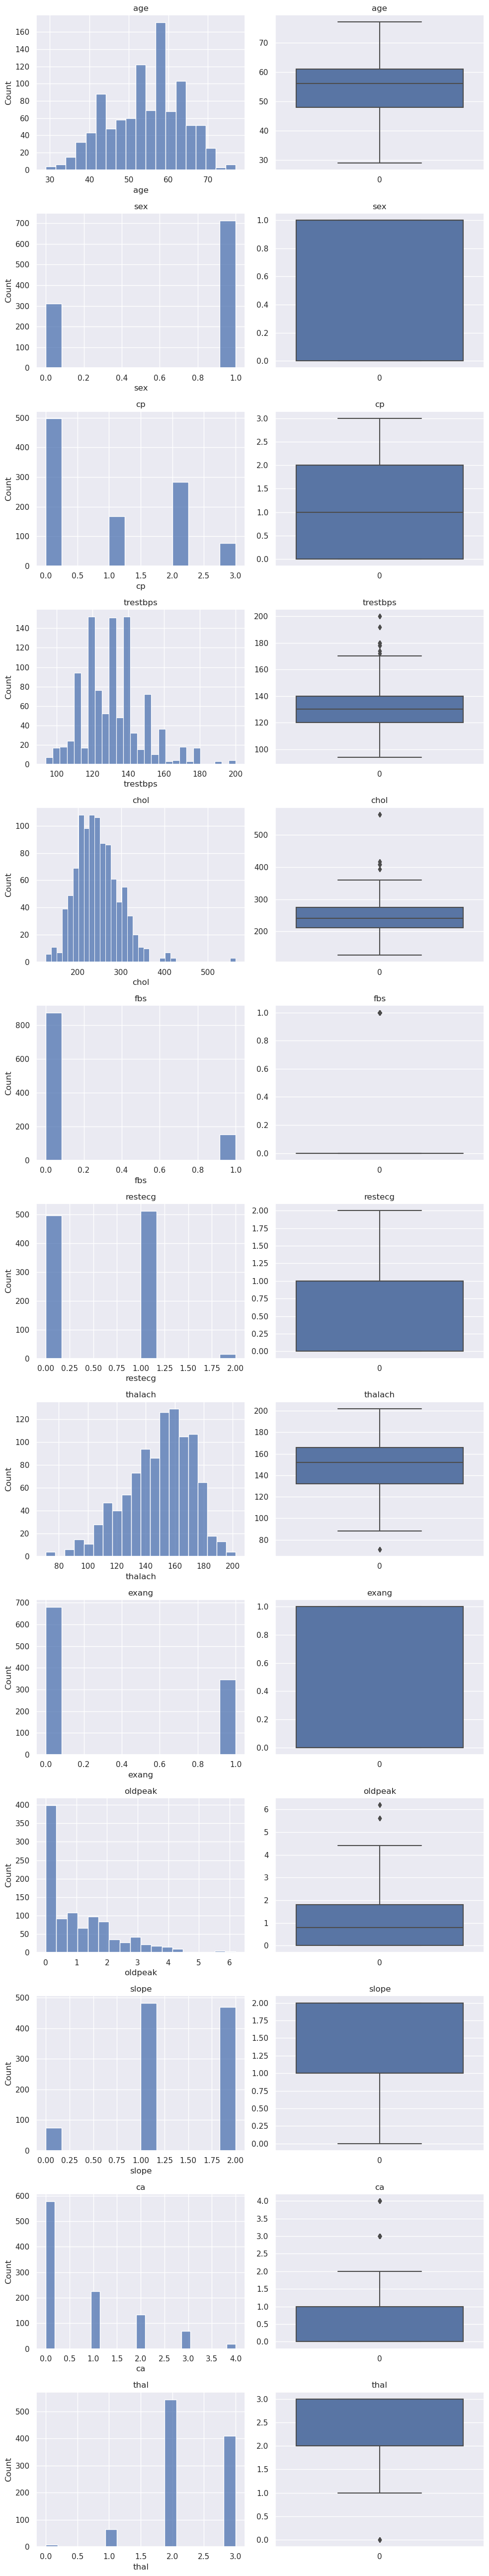

In [11]:
# Set the Seaborn theme
sns.set_theme()

# Define the list of features to plot
features = ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal']

# Create subplots for each feature
fig, axes = plt.subplots(nrows = len(features), ncols = 2, figsize = (10, 4*len(features)))

# Loop over each feature and plot a histogram and boxplot
for i, feature in enumerate(features):
    sns.histplot(disease_data[feature], ax=axes[i, 0])
    axes[i, 0].set_title(feature)

    sns.boxplot(data=disease_data[feature], ax=axes[i, 1])
    axes[i, 1].set_title(feature)

# Adjust the layout and display the plot
plt.tight_layout()
plt.show()

Visualization

1--> defective heart
0--> healthy

<Axes: xlabel='target', ylabel='count'>

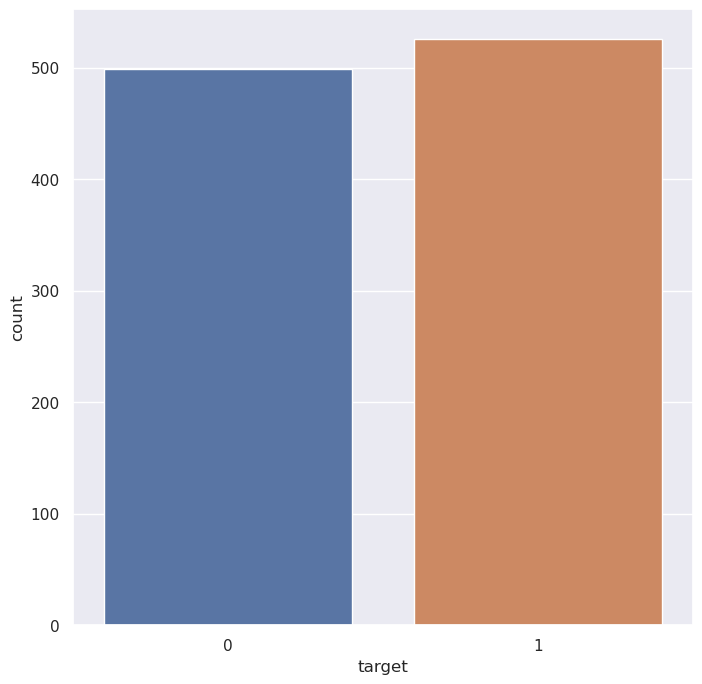

In [12]:
# check number of healthy and defective people
plt.figure(figsize=(8,8))
sns.set_theme()
sns.countplot(data=disease_data,x='target')

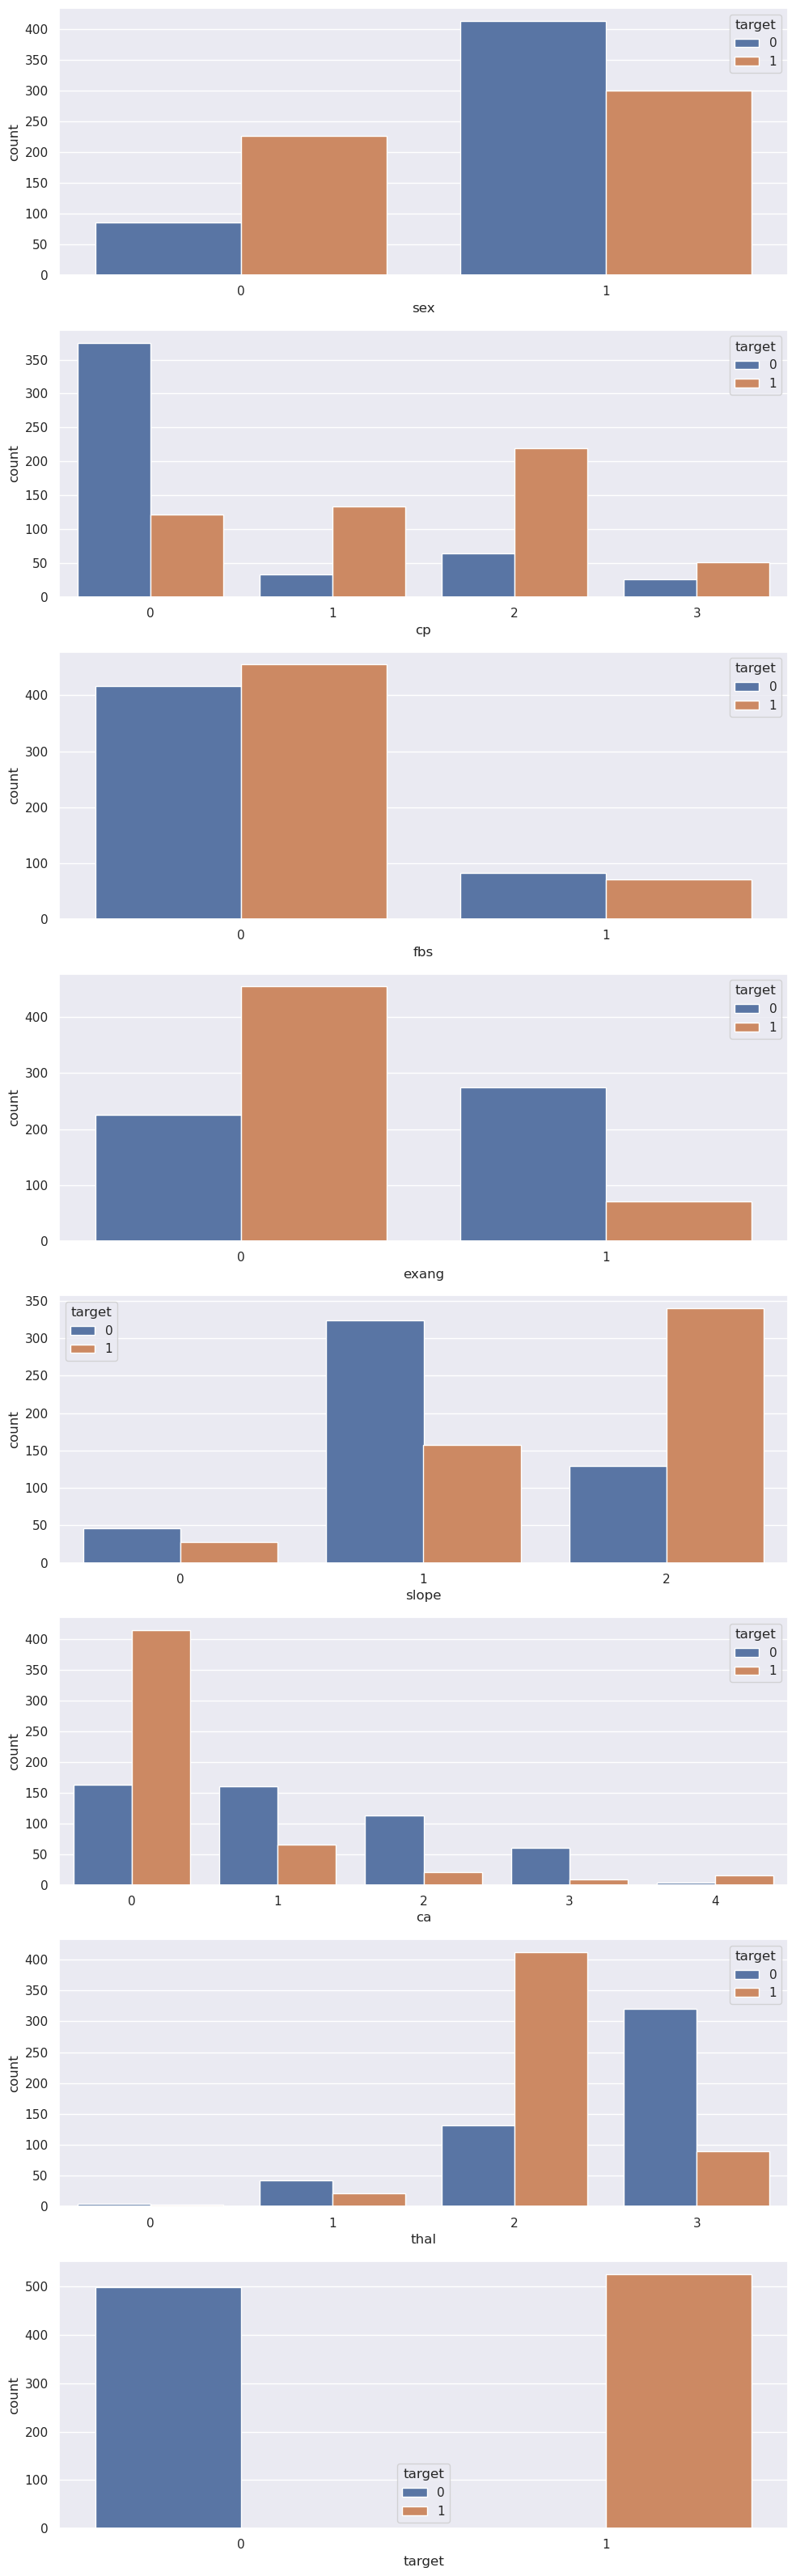

In [13]:
# see the relation between the features and target
sns.set_theme()

# Define the list of features to plot
features = ['sex', 'cp','fbs','exang','slope', 'ca', 'thal', 'target']

# Create subplots for each feature
fig, axes = plt.subplots(nrows=len(features), ncols=1, figsize=(10, 4*len(features)))

# Loop over each feature and plot a countplot
for i, feature in enumerate(features):
    sns.countplot(x=disease_data[feature],hue=disease_data['target'] ,ax=axes[i])


# Adjust the layout and display the plot
plt.tight_layout()
plt.show()

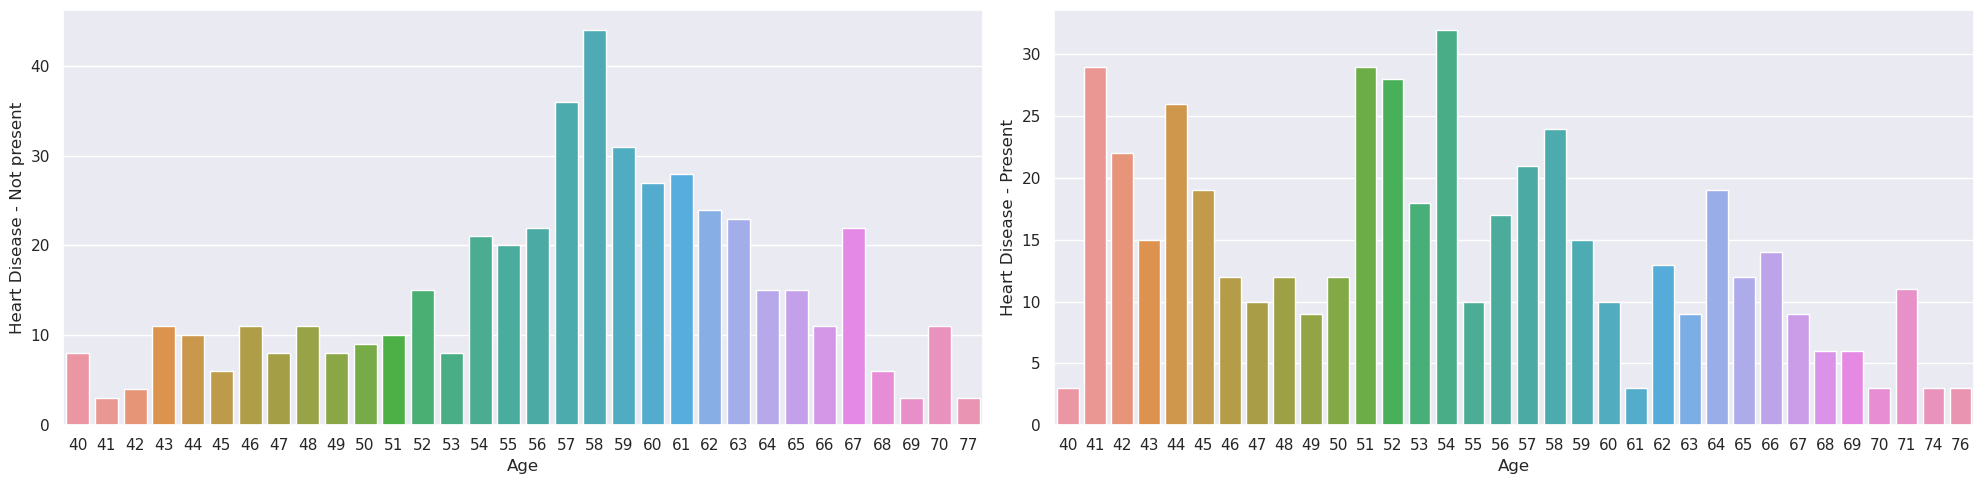

In [14]:
sns.set_theme()

# Create subplots for the two countplots
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(20,5))

# Plot the count of age when target is 0
sns.countplot(x='age', data=disease_data[(disease_data['age'] >= 40) & (disease_data['target'] == 0)], ax=axes[0])
axes[0].set_xlabel('Age')
axes[0].set_ylabel('Heart Disease - Not present')

# Plot the count of age when target is 1
sns.countplot(x='age', data=disease_data[(disease_data['age'] >= 40) & (disease_data['target'] == 1)], ax=axes[1])
axes[1].set_xlabel('Age')
axes[1].set_ylabel('Heart Disease - Present')

# Adjust the layout and display the plot
plt.tight_layout()
plt.show()

Correlation between features

In [15]:
corr=disease_data.corr()

<Axes: >

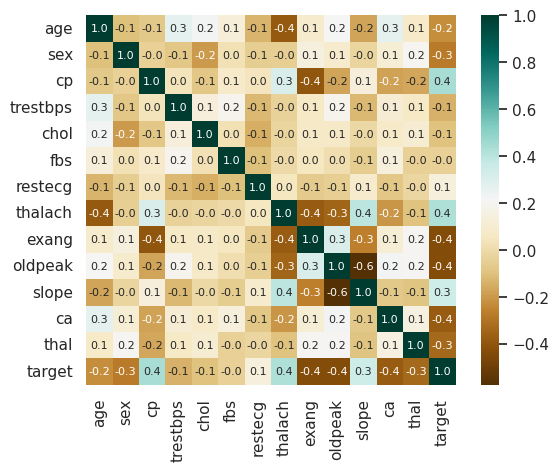

In [16]:
sns.heatmap(corr,cbar=True,square=True,fmt='.1f',annot=True,annot_kws={'size':8},cmap = 'BrBG')

Split the features and target

In [17]:
# split tha data and target
X=disease_data.drop(['target'],axis=1)
Y=disease_data['target']
print(X)

      age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
0      52    1   0       125   212    0        1      168      0      1.0   
1      53    1   0       140   203    1        0      155      1      3.1   
2      70    1   0       145   174    0        1      125      1      2.6   
3      61    1   0       148   203    0        1      161      0      0.0   
4      62    0   0       138   294    1        1      106      0      1.9   
...   ...  ...  ..       ...   ...  ...      ...      ...    ...      ...   
1020   59    1   1       140   221    0        1      164      1      0.0   
1021   60    1   0       125   258    0        0      141      1      2.8   
1022   47    1   0       110   275    0        0      118      1      1.0   
1023   50    0   0       110   254    0        0      159      0      0.0   
1024   54    1   0       120   188    0        1      113      0      1.4   

      slope  ca  thal  
0         2   2     3  
1         0   0     3  
2  

Feature Standardization

In [18]:
scaler=StandardScaler()
scaler.fit(X)
scaler.transform(X)

array([[-0.26843658,  0.66150409, -0.91575542, ...,  0.99543334,
         1.20922066,  1.08985168],
       [-0.15815703,  0.66150409, -0.91575542, ..., -2.24367514,
        -0.73197147,  1.08985168],
       [ 1.71659547,  0.66150409, -0.91575542, ..., -2.24367514,
        -0.73197147,  1.08985168],
       ...,
       [-0.81983438,  0.66150409, -0.91575542, ..., -0.6241209 ,
         0.23862459, -0.52212231],
       [-0.4889957 , -1.51170646, -0.91575542, ...,  0.99543334,
        -0.73197147, -0.52212231],
       [-0.04787747,  0.66150409, -0.91575542, ..., -0.6241209 ,
         0.23862459,  1.08985168]])

Split the training && test data

In [19]:
# spliting training and test data
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.2,stratify=Y,random_state=2)
print(x_train.shape,x_test.shape,X.shape)

(820, 13) (205, 13) (1025, 13)


Build && Train the model

Logistic Regression

In [20]:
#Logistic Regression

# Create a logistic regression model
model = LogisticRegression(max_iter=1000)

In [21]:
# Train the model on the training data
model.fit(x_train, y_train)


LogisticRegression(max_iter=1000)

In [22]:
# Make predictions on the test data
log_y_pred = model.predict(x_test)
log_y_pred1 = model.predict(x_train)

# Evaluate the model
accuracy = metrics.accuracy_score(y_test, log_y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.8146341463414634


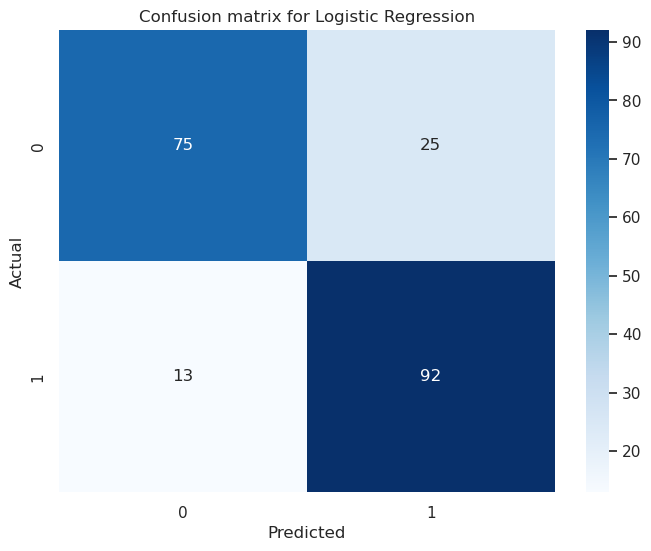

In [23]:
# Create a confusion matrix
cm = confusion_matrix(y_test, log_y_pred)

# Display the confusion matrix using a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap="Blues")
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion matrix for Logistic Regression')
plt.show()

In [24]:
# Calculate and display F1 score, recall, and precision
print(classification_report(y_test, log_y_pred))

              precision    recall  f1-score   support

           0       0.85      0.75      0.80       100
           1       0.79      0.88      0.83       105

    accuracy                           0.81       205
   macro avg       0.82      0.81      0.81       205
weighted avg       0.82      0.81      0.81       205



SVM 

In [25]:
# Create a SVM model
svc= SVC(kernel='linear')

# Train the model on the training data
svc.fit(x_train, y_train)

# Make predictions on the testing data
svc_y_pred = svc.predict(x_test)

# Make predictions on the training data
svc_y_pred1 = svc.predict(x_train)

# Evaluate the model
accuracy = metrics.accuracy_score(y_test, svc_y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.824390243902439


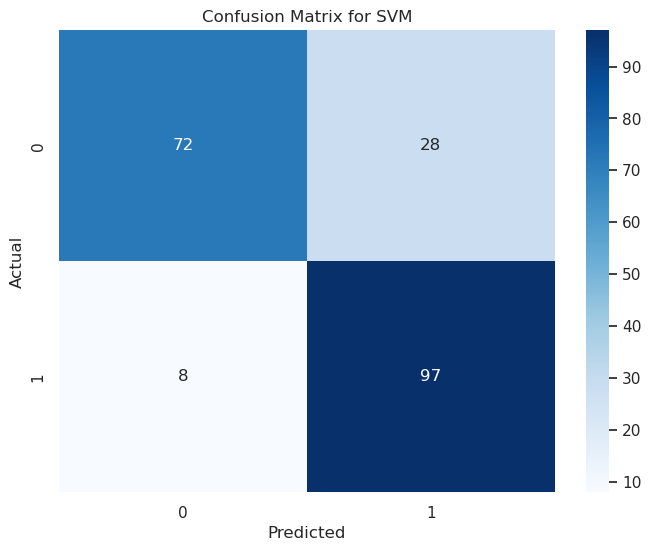

In [26]:
# Create a confusion matrix
cm = confusion_matrix(y_test, svc_y_pred)

# Display the confusion matrix using a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap="Blues")
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for SVM')
plt.show()

In [27]:
# Calculate and display F1 score, recall, and precision
print(classification_report(y_test, svc_y_pred))

              precision    recall  f1-score   support

           0       0.90      0.72      0.80       100
           1       0.78      0.92      0.84       105

    accuracy                           0.82       205
   macro avg       0.84      0.82      0.82       205
weighted avg       0.84      0.82      0.82       205



Random Forest

In [28]:
RF = RandomForestClassifier(max_depth=15,random_state=0)
RF.fit(x_train, y_train)

RandomForestClassifier(max_depth=15, random_state=0)

In [29]:
## Make predictions on the test data
RF_y_pred = RF.predict(x_test)

In [30]:
# Evaluate the performance of the model
accuracy = accuracy_score(y_test, RF_y_pred)
print('Accuracy:', accuracy)

Accuracy: 1.0


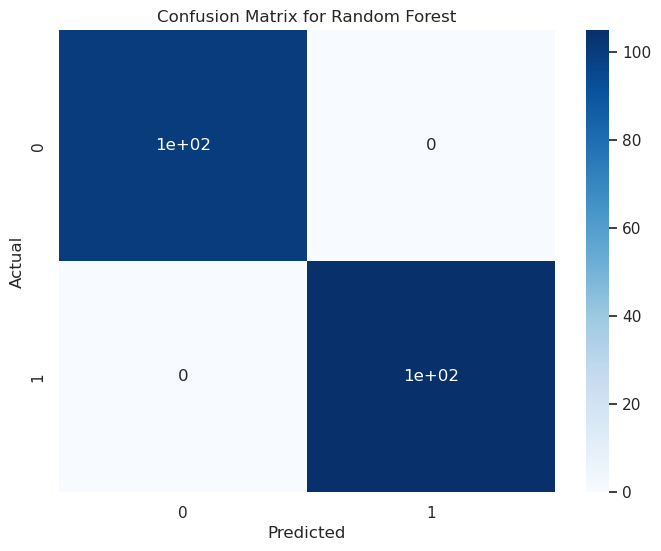

In [31]:
# Create a confusion matrix
cm = confusion_matrix(y_test, RF_y_pred)

# Display the confusion matrix using a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap="Blues")
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for Random Forest')
plt.show()

In [32]:
# Calculate and display F1 score, recall, and precision
print(classification_report(y_test,RF_y_pred ))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       100
           1       1.00      1.00      1.00       105

    accuracy                           1.00       205
   macro avg       1.00      1.00      1.00       205
weighted avg       1.00      1.00      1.00       205



The Logistic Regression and Naive Bayes model have the best accuracy =0.82 . The Decision Tree has the least accuracy =0.77.

In [33]:
print("tha best model is:Random Forest with accuracy=","%",100)

tha best model is:Random Forest with accuracy= % 100


Build a Predictive System

In [34]:
#input_data=[46,0,2,142,177,0,0,160,1,1.4,0,0,2]#does have a heart disease
input_data=[58,0,0,100,248,0,0,122,0,1,1,0,2]#does have a heart disease
input_data1=[67,1,0,160,286,0,0,108,1,1.5,1,3,2]#does not have a heart disease

#change input data into numpy array
input_data_as_array=np.asarray(input_data)

#reshape the numpy array as we predict for only one instance
input_data_reshaped = input_data_as_array.reshape(1,-1)
prediction = RF.predict(input_data_reshaped)

if(prediction[0]==0):
  print("the person does not have a heart disease")
else:
    print("the person does have a heart disease")


the person does have a heart disease


/opt/conda/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
